# My First Notebook

There are some necessary libraries to import for making car price prediction.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# 1.Load the data

First thing that we want to do is loading the data from CSV file. The amount of data is the input for the price prediction of the cars. 

In [8]:
# Load the dataset
df = pd.read_csv('car_price_dataset.csv')

In [9]:
#Let's check the first five rows of the data
print(df.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

You can see a lot of the data so we will 

# 2. EDA

<Axes: >

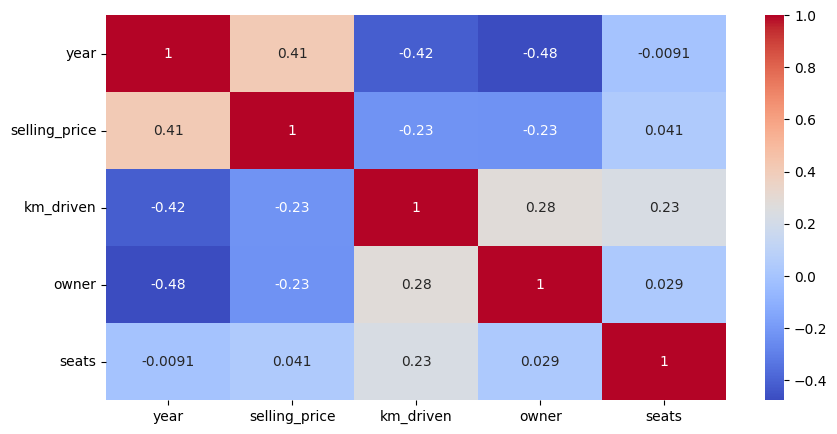

In [37]:
# Let's check out heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") 

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["owner"] = le.fit_transform(df["owner"])

df["owner"].unique()

array([0, 2, 4, 1, 3])

In [11]:
le.classes_

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)